<h1 style="text-align:center;">Laboratorio 5</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">1/9/2023</h5>

## Librerias

In [2]:
import pandas as pd
import re
import io 
from cgitb import text
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

C:\Users\Mariana\AppData\Local\Temp\ipykernel_13852\1833309588.py:4: DeprecationWarning: 'cgitb' is deprecated and slated for removal in Python 3.13
  from cgitb import text


1. Descargue el archivo train.csv 

In [3]:
df = pd.read_csv('data/train.csv')

2. Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje. 

In [4]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento 
que llevó a cabo. 

3.1.  Se pueden hacer tareas como: 
- Convertir el texto a mayúsculas o a minúsculas 

In [5]:
df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [6]:
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')

- Quitar las url 

In [7]:
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]

- Revisar si hay emoticones y quitarlos

In [8]:
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]

- Quitar los signos de puntuación 

In [9]:
# Función para quitar signos de puntuación
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Mostrar el DataFrame resultante
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this earthquake Ma...       1  
1                 Forest fire near La Ronge Sask Canada       1  
2     All residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     Just got sent this photo from Ruby Alaska as s...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary TheTawniest The out of control wild...       1  
7610              M19

- Quitar los artículos, preposiciones y conjunciones (stopwords) 

In [10]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')  # You might need to download NLTK data for stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])

0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610                    M194 0104 UTC5km S Volcano Hawaii
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


- Quitar números si considera que interferirán en la clasificación (quizá debería valorar 
si quitar o no el 911). 

In [23]:
import pandas as pd
import re

# Crear una función para preprocesar el texto
def preprocesar_texto(texto):
    return re.sub(r'\d+', '', texto.lower())

# Suponiendo que ya tienes un DataFrame llamado 'df' con una columna 'text'
df['texto_preprocesado'] = clean_tweets.apply(preprocesar_texto)

# Mostrar las primeras filas para ver los cambios
df[['text', 'texto_preprocesado']].head()

,text,texto_preprocesado
0,Our Deeds are the Reason of this earthquake Ma...,our deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,All residents asked to shelter in place are be...,all residents asked shelter place notified off...
3,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders ca...
4,Just got sent this photo from Ruby Alaska as s...,just got sent photo ruby alaska smoke wildfire...


In [13]:
#Para observar como va la data
clean_tweets.to_csv('output/newTrain.csv', index=False,encoding='utf-8')

4. Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué 
palabras cree que le servirán para hacer un mejor modelo de clasificación?¿vale la pena explorar 
bigramas o trigramas para analizar contexto? 

In [14]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency

,0
Our Deeds Reason earthquake May ALLAH Forgive us,1
Forest fire near La Ronge Sask Canada,1
All residents asked shelter place notified officers No evacuation shelter place orders expected,1
13000 people receive wildfires evacuation orders California,1
Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...
breaking LA Refugio oil spill may costlier bigger projected,1
siren went wasnt Forney tornado warning,1
Officials say quarantine place Alabama home possible Ebola case developing symptoms,1
flip side Walmart bomb everyone evacuate stay tuned blow,1


In [25]:
df['preprocessed_text'] = df['text'].apply(preprocesar_texto)
# Verificar las primeras filas para asegurarse de que se haya agregado la columna correctamente
print(df.head())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this earthquake Ma...   
1   4     NaN      NaN              Forest fire near La Ronge Sask Canada   
2   5     NaN      NaN  All residents asked to shelter in place are be...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  Just got sent this photo from Ruby Alaska as s...   

   target                             text_without_stopwords  \
0       1   Our Deeds Reason earthquake May ALLAH Forgive us   
1       1              Forest fire near La Ronge Sask Canada   
2       1  All residents asked shelter place notified off...   
3       1  13000 people receive wildfires evacuation orde...   
4       1  Just got sent photo Ruby Alaska smoke wildfire...   

                                  texto_preprocesado  \
0   our deeds reason earthquake may allah forgive us   
1              forest fire near la ronge

In [27]:
from collections import Counter, defaultdict
# Verificar el recuento de ejemplos en cada etiqueta
print("Recuento de ejemplos por etiqueta:")
print(df['target'].value_counts())

# Mostrar algunas muestras de texto para cada etiqueta
for etiqueta in df['target'].unique():
    print(f"\n Etiqueta {etiqueta}:")
    ejemplos = df[df['target'] == etiqueta]['preprocessed_text'].head(5)  # Muestra las primeras 5 muestras
    for i, ejemplo in enumerate(ejemplos, start=1):
        print(f"{i}. {ejemplo}")

# Calcular las palabras más comunes nuevamente
palabras_comunes = {}

for etiqueta in df['target'].unique():
    df_filtrado = df[df['target'] == etiqueta]
    contador = Counter(palabra for lista_palabras in df_filtrado['preprocessed_text'] for palabra in lista_palabras)
    palabra_mas_comun = contador.most_common(1)[0][0]
    palabras_comunes[etiqueta] = palabra_mas_comun

# Imprimir las palabras más comunes por etiqueta
for etiqueta, palabra in palabras_comunes.items():
    print(f"Palabra más común para etiqueta {etiqueta}: {palabra}")


Recuento de ejemplos por etiqueta:
target
0    4342
1    3271
Name: count, dtype: int64

 Etiqueta 1:
1. our deeds are the reason of this earthquake may allah forgive us all
2. forest fire near la ronge sask canada
3. all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
4.  people receive wildfires evacuation orders in california 
5. just got sent this photo from ruby alaska as smoke from wildfires pours into a school 

 Etiqueta 0:
1. whats up man
2. i love fruits
3. summer is lovely
4. my car is so fast
5. what a goooooooaaaaaal
Palabra más común para etiqueta 1:  
Palabra más común para etiqueta 0:  


Palabras más comunes en tweets de desastres (sin stop words y preposiciones):
[('from', 207), ('are', 151), ('after', 140), ('have', 138), ('fire', 126), ('via', 119), ('this', 113), ('be', 111), ('over', 110), ('you', 109), ('California', 108), ('my', 108), ('has', 98), ('people', 94), ('been', 94), ('up', 94), ('were', 93), ('who', 90), ('killed', 87), ('News', 85)]

Palabras más comunes en tweets que no son de desastres (sin stop words y preposiciones):
[('you', 556), ('my', 440), ('be', 271), ('this', 235), ('me', 224), ('have', 221), ('your', 204), ('are', 197), ('just', 196), ('so', 193), ('out', 187), ('up', 179), ('but', 172), ('not', 165), ('from', 165), ('will', 148), ('all', 141), ('or', 139), ('has', 132), ('about', 127)]


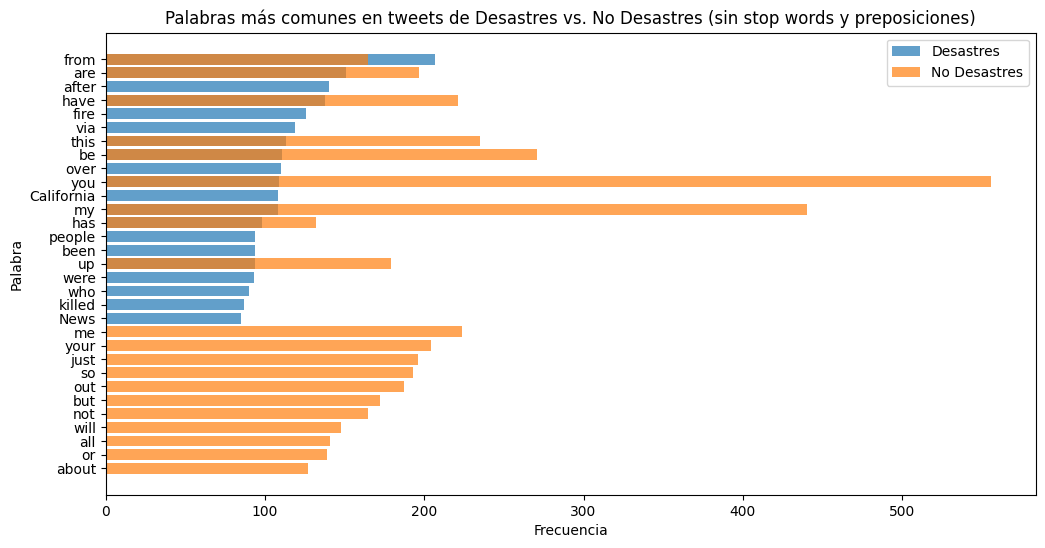

In [42]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Descargar las stop words

# Obtener la frecuencia de palabras para tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener la frecuencia de palabras para tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Tokenizar y contar palabras en tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_frequency = Counter(disaster_words)

# Tokenizar y contar palabras en tweets que no son de desastres
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_frequency = Counter(non_disaster_words)

# Obtener las stop words en inglés
stop_words = set(stopwords.words('english'))

# Definir palabras adicionales a excluir
excluded_words = set(["the", "and", "in", "on", "at", "by", "for", "with", "of", "to", "is", "that", "it", 'the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp',
'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2','was', 'as'])

# Agregar las palabras adicionales a excluir a las stop words
stop_words.update(excluded_words)

# Filtrar las palabras frecuentes excluyendo las stop words
filtered_disaster_word_frequency = [(word, freq) for word, freq in disaster_word_frequency.items() if word.lower() not in stop_words]
filtered_non_disaster_word_frequency = [(word, freq) for word, freq in non_disaster_word_frequency.items() if word.lower() not in stop_words]

# Ordenar las listas filtradas por frecuencia
filtered_disaster_word_frequency.sort(key=lambda x: x[1], reverse=True)
filtered_non_disaster_word_frequency.sort(key=lambda x: x[1], reverse=True)

# Imprimir las 20 palabras más comunes en tweets de desastres sin stop words
print("Palabras más comunes en tweets de desastres (sin stop words):")
print(filtered_disaster_word_frequency[:20])

# Imprimir las 20 palabras más comunes en tweets que no son de desastres sin stop words
print("\nPalabras más comunes en tweets que no son de desastres (sin stop words):")
print(filtered_non_disaster_word_frequency[:20])

# Graficar las 20 palabras más comunes en ambos grupos
plt.figure(figsize=(12, 6))
plt.barh(*zip(*filtered_disaster_word_frequency[:20]), label='Desastres', alpha=0.7)
plt.barh(*zip(*filtered_non_disaster_word_frequency[:20]), label='No Desastres', alpha=0.7)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras más comunes en tweets de Desastres vs. No Desastres (sin stop words)')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

### Bigrama

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

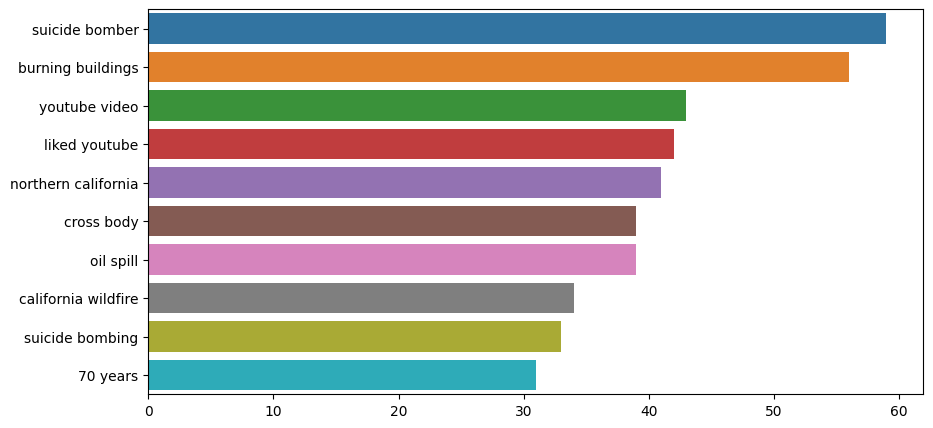

In [18]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [35]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

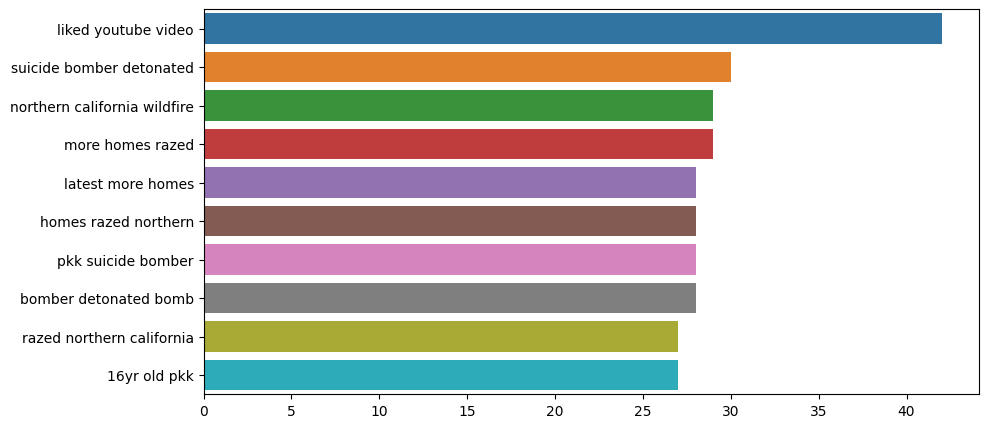

In [36]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

In [44]:
import numpy as np

tweets = df['text_without_stopwords'].tolist()

# Función para obtener los n-gramas más frecuentes y sus probabilidades en los tuits
def obtener_ngramas_top(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    matriz_frecuencias = vec.transform(corpus)
    suma_palabras = matriz_frecuencias.sum(axis=0)
    total_palabras = np.sum(suma_palabras)
    frecuencias_palabras = [(palabra, suma_palabras[0, idx]) for palabra, idx in vec.vocabulary_.items()]
    frecuencias_palabras = sorted(frecuencias_palabras, key=lambda x: x[1], reverse=True)
    
    # Calcular probabilidades
    ngramas_probabilidades = [(palabra, frecuencia, frecuencia / total_palabras) for palabra, frecuencia in frecuencias_palabras]
    
    return ngramas_probabilidades[:n]

# Obtener y mostrar los bigramas más frecuentes y sus probabilidades
top_bigramas = obtener_ngramas_top(tweets, ngram_range=(2, 2), n=10)
print("Top 10 Bigramas más Frecuentes:")
for bigrama, frecuencia, probabilidad  in top_bigramas:
    print(f"Bigrama: {bigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")

# Obtener y mostrar los trigramas más frecuentes y sus probabilidades
top_trigramas = obtener_ngramas_top(tweets, ngram_range=(3, 3), n=10)
print("\nTop 10 Trigramas más Frecuentes:")
for trigrama, frecuencia, probabilidad  in top_trigramas:
    print(f"Trigrama: {trigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")


Top 10 Bigramas más Frecuentes:
Bigrama: suicide bomber, Frecuencia: 59.000000, Probabilidad: 0.000905
Bigrama: burning buildings, Frecuencia: 56.000000, Probabilidad: 0.000859
Bigrama: youtube video, Frecuencia: 43.000000, Probabilidad: 0.000660
Bigrama: liked youtube, Frecuencia: 42.000000, Probabilidad: 0.000644
Bigrama: northern california, Frecuencia: 41.000000, Probabilidad: 0.000629
Bigrama: cross body, Frecuencia: 39.000000, Probabilidad: 0.000598
Bigrama: oil spill, Frecuencia: 39.000000, Probabilidad: 0.000598
Bigrama: california wildfire, Frecuencia: 34.000000, Probabilidad: 0.000522
Bigrama: suicide bombing, Frecuencia: 33.000000, Probabilidad: 0.000506
Bigrama: 70 years, Frecuencia: 31.000000, Probabilidad: 0.000476

Top 10 Trigramas más Frecuentes:
Trigrama: liked youtube video, Frecuencia: 42.000000, Probabilidad: 0.000729
Trigrama: suicide bomber detonated, Frecuencia: 30.000000, Probabilidad: 0.000521
Trigrama: northern california wildfire, Frecuencia: 29.000000, Proba

Basado en los resultados, las palabras que podrían servir para un mejor modelo de clasificación son aquellas que son distintivas y específicas del contexto de desastres, como "forest fire", "evacuation", "earthquake", etc. Además, explorar bigramas y trigramas es valioso para capturar relaciones de palabras significativas y contextuales en los tweets, lo que podría mejorar la capacidad del modelo para analizar el contexto.

5. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 

5.1.  Puede, para cada archivo: 
- Investigar qué palabra se repite más en cada una de las categorías 

In [45]:
from collections import Counter
from nltk.corpus import stopwords
import re

# Obtener los tweets de desastres (target = 1) y los tweets que no son de desastres (target = 0)
disaster_tweets = df[df['target'] == 1]['text']
non_disaster_tweets = df[df['target'] == 0]['text']

# Crear una función para preprocesar el texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar el texto
    tokens = text.split()
    # Eliminar las palabras de parada (stop words)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Tokenizar y contar palabras en tweets de desastres
disaster_words = [word for tweet in disaster_tweets for word in preprocess_text(tweet)]
disaster_word_frequency = Counter(disaster_words)

# Tokenizar y contar palabras en tweets que no son de desastres
non_disaster_words = [word for tweet in non_disaster_tweets for word in preprocess_text(tweet)]
non_disaster_word_frequency = Counter(non_disaster_words)

# Encontrar la palabra más común en cada categoría
most_common_disaster_word = disaster_word_frequency.most_common(1)[0]
most_common_non_disaster_word = non_disaster_word_frequency.most_common(1)[0]

print("Palabra más común en tweets de desastres:", most_common_disaster_word[0])
print("Frecuencia en tweets de desastres:", most_common_disaster_word[1])

print("\nPalabra más común en tweets que no son de desastres:", most_common_non_disaster_word[0])
print("Frecuencia en tweets que no son de desastres:", most_common_non_disaster_word[1])


Palabra más común en tweets de desastres: fire
Frecuencia en tweets de desastres: 179

Palabra más común en tweets que no son de desastres: like
Frecuencia en tweets que no son de desastres: 252


- Hacer una nube de palabras para visualizar las que aparecen con más frecuencia 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


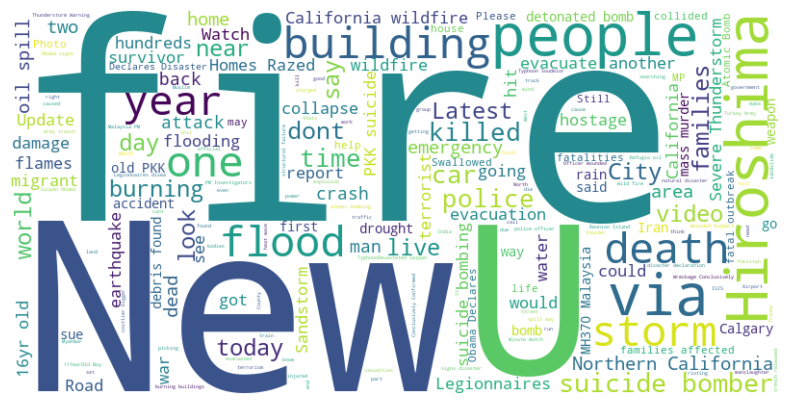

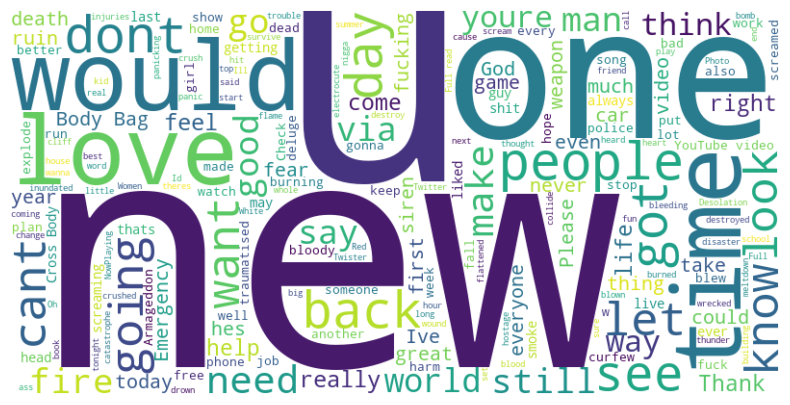

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Descargar las stop words en inglés

# Obtener el texto de los tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener el texto de los tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Combinar todos los tweets en una cadena de texto para cada grupo
disaster_text = ' '.join(disaster_tweets)
non_disaster_text = ' '.join(non_disaster_tweets)

# Definir las stop words en inglés
stop_words = set(stopwords.words('english'))

# Definir palabras adicionales a excluir (opcional)
excluded_words = set(["the", "and", "in", "on", "at", "by", "for", "with", "of", "to", "is", "that", "it", 'the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp',
'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2','was', 'as'])

# Actualizar las stop words con las palabras adicionales (si es necesario)
stop_words.update(excluded_words)

# Crear una función para generar una nube de palabras
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generar la nube de palabras para tweets de desastres
generate_word_cloud(disaster_text)

# Generar la nube de palabras para tweets que no son de desastres
generate_word_cloud(non_disaster_text)


- Hacer un histograma con las palabras que más se repiten

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


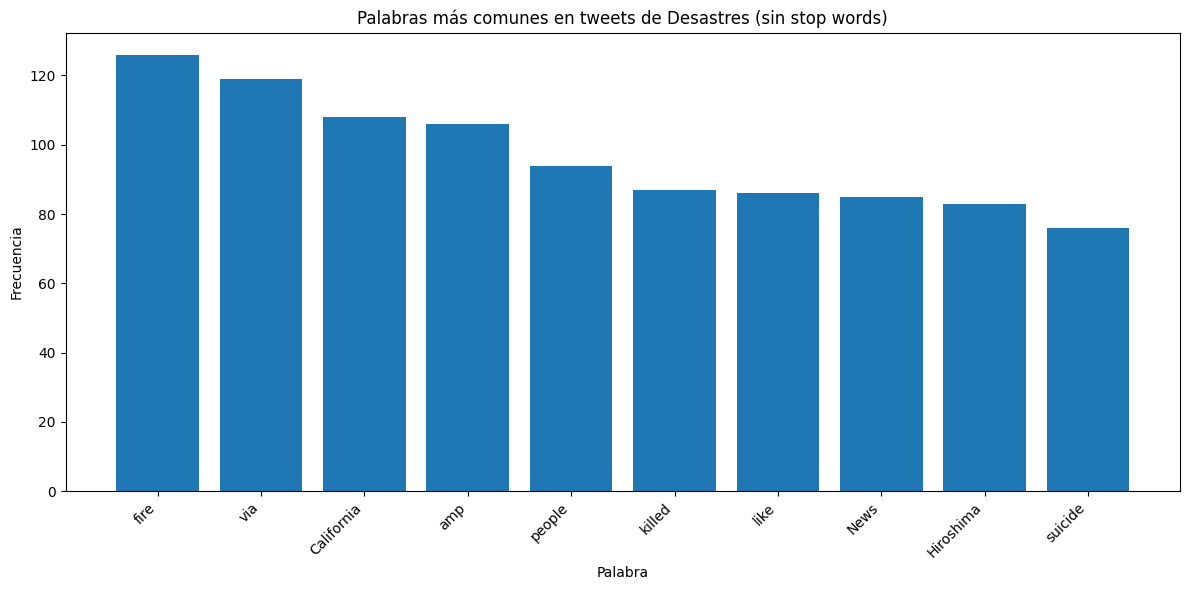

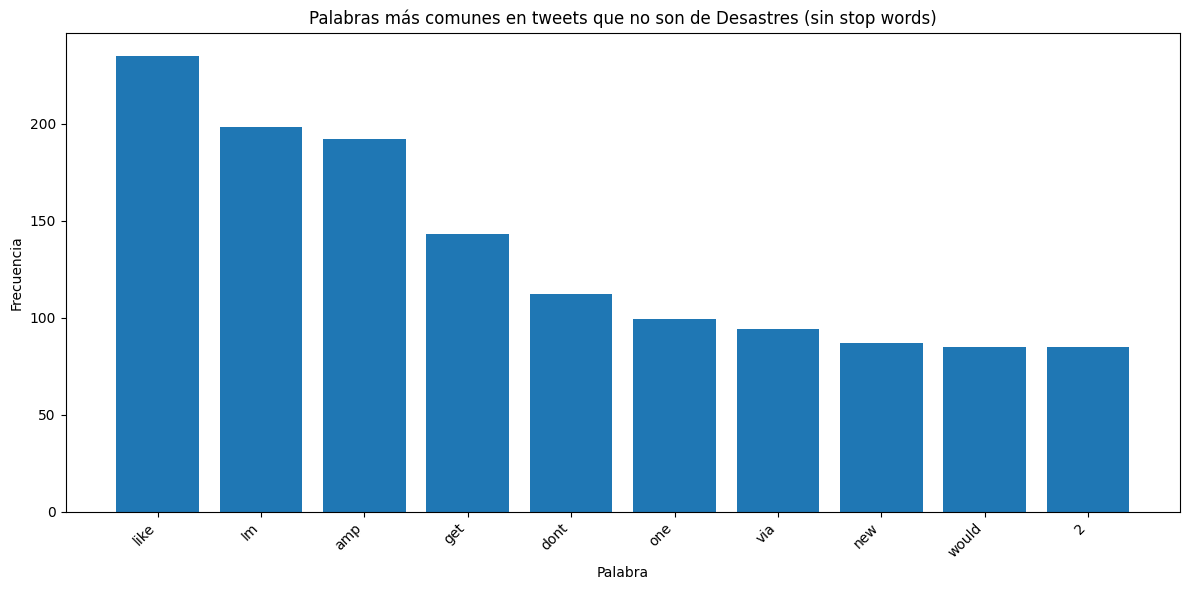

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')  # Descargar las stop words en inglés

# Obtener el texto de los tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener el texto de los tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Combinar todos los tweets en una cadena de texto para cada grupo
disaster_text = ' '.join(disaster_tweets)
non_disaster_text = ' '.join(non_disaster_tweets)

# Definir las stop words en inglés
stop_words = set(stopwords.words('english'))

# Crear una función para obtener las palabras más comunes
def get_most_common_words(text, num_words=10):
    words = text.split()
    # Excluir stop words
    words = [word for word in words if word.lower() not in stop_words]
    word_counts = Counter(words)
    # Ordenar por frecuencia
    most_common_words = word_counts.most_common(num_words)
    return most_common_words

# Obtener las palabras más comunes en los tweets de desastres (top 10)
disaster_most_common = get_most_common_words(disaster_text, num_words=10)

# Obtener las palabras más comunes en los tweets que no son de desastres (top 10)
non_disaster_most_common = get_most_common_words(non_disaster_text, num_words=10)

# Crear listas de palabras y frecuencias para el histograma
disaster_words, disaster_frequencies = zip(*disaster_most_common)
non_disaster_words, non_disaster_frequencies = zip(*non_disaster_most_common)

# Crear un histograma de las palabras más comunes en los tweets de desastres
plt.figure(figsize=(12, 6))
plt.bar(disaster_words, disaster_frequencies)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en tweets de Desastres (sin stop words)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Crear un histograma de las palabras más comunes en los tweets que no son de desastres
plt.figure(figsize=(12, 6))
plt.bar(non_disaster_words, non_disaster_frequencies)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en tweets que no son de Desastres (sin stop words)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [51]:
# Imprimir los datos de palabras más comunes en los tweets de desastres
print("Palabras más comunes en tweets de Desastres (sin stop words):")
for word, freq in disaster_most_common:
    print(f"{word}: {freq}")

# Imprimir los datos de palabras más comunes en los tweets que no son de desastres
print("\nPalabras más comunes en tweets que no son de Desastres (sin stop words):")
for word, freq in non_disaster_most_common:
    print(f"{word}: {freq}")

Palabras más comunes en tweets de Desastres (sin stop words):
fire: 126
via: 119
California: 108
amp: 106
people: 94
killed: 87
like: 86
News: 85
Hiroshima: 83
suicide: 76

Palabras más comunes en tweets que no son de Desastres (sin stop words):
like: 235
Im: 198
amp: 192
get: 143
dont: 112
one: 99
via: 94
new: 87
would: 85
2: 85


- Discutir sobre las palabras que tienen presencia en todas las categorías. 

Las palabras más comunes en tweets de desastres, como "fire," "California," y "killed," reflejan la naturaleza de las conversaciones relacionadas con eventos catastróficos. La alta frecuencia de "fire" y "California" puede indicar la ocurrencia de incendios forestales en esa región, mientras que "killed" subraya la gravedad de la situación. Por otro lado, en los tweets que no son de desastres, "like," "Im," y "get" son las palabras más recurrentes. Esto sugiere que las conversaciones en esta categoría pueden centrarse en temas más variados, como experiencias personales o actividades cotidianas.

La presencia de palabras como "amp" y "via" en ambas categorías puede indicar su uso frecuente en Twitter para compartir información o retuitear contenido. Además, la aparición de "like" en ambas categorías sugiere que esta palabra se utiliza ampliamente en diversos contextos, lo que destaca la importancia de considerar el contexto general de un tweet al analizar su contenido y significado.

- Determinar las palabras positivas, negativas o neutras 

In [53]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Descargar las stop words en inglés

# Obtener el texto de los tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener el texto de los tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Definir las stop words en inglés
stop_words = set(stopwords.words('english'))

# Palabras que deseas considerar como negativas
negative_words = set(["suicide", "fire"])  # Puedes agregar más palabras si es necesario

# Crear una función para determinar la polaridad de las palabras
def get_word_sentiment(word):
    if word in negative_words:
        return 'negativa'
    analysis = TextBlob(word)
    # Determinar la polaridad del sentimiento (-1 a 1)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'positiva'
    elif sentiment < 0:
        return 'negativa'
    else:
        return 'neutral'

# Aplicar la función a las palabras más comunes en los tweets de desastres
disaster_words, _ = zip(*disaster_most_common)
disaster_word_sentiments = {word: get_word_sentiment(word) for word in disaster_words}

# Aplicar la función a las palabras más comunes en los tweets que no son de desastres
non_disaster_words, _ = zip(*non_disaster_most_common)
non_disaster_word_sentiments = {word: get_word_sentiment(word) for word in non_disaster_words}

# Imprimir las polaridades de las palabras en ambos grupos
print("Polaridades de las palabras en tweets de Desastres:")
for word, sentiment in disaster_word_sentiments.items():
    print(f"{word}: {sentiment}")

print("\nPolaridades de las palabras en tweets que no son de Desastres:")
for word, sentiment in non_disaster_word_sentiments.items():
    print(f"{word}: {sentiment}")


Polaridades de las palabras en tweets de Desastres:
fire: negativa
via: neutral
California: neutral
amp: neutral
people: neutral
killed: negativa
like: neutral
News: neutral
Hiroshima: neutral
suicide: negativa

Polaridades de las palabras en tweets que no son de Desastres:
like: neutral
Im: neutral
amp: neutral
get: neutral
dont: neutral
one: neutral
via: neutral
new: positiva
would: neutral
2: neutral


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6. Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan 
positivo, negativo o neutral es el mismo. 

In [57]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Descargar las stop words en inglés

# Obtener el texto de los tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener el texto de los tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Definir las stop words en inglés
stop_words = set(stopwords.words('english'))

# Palabras que deseas considerar como positivas y negativas
positive_words = set(["good", "happy", "excellent"])  # Puedes agregar más palabras si es necesario
negative_words = set(["bad", "sad", "terrible"])  # Puedes agregar más palabras si es necesario

# Función para determinar la polaridad de las palabras
def get_word_sentiment(word):
    if word in positive_words:
        return 'positiva'
    elif word in negative_words:
        return 'negativa'
    else:
        return 'neutral'

# Función para calcular el sentimiento de un tweet
def calculate_tweet_sentiment(tweet):
    words = tweet.split()
    positive_count = 0
    negative_count = 0
    for word in words:
        word_sentiment = get_word_sentiment(word)
        if word_sentiment == 'positiva':
            positive_count += 1
        elif word_sentiment == 'negativa':
            negative_count += 1
    if positive_count > negative_count:
        return 'positivo'
    elif negative_count > positive_count:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar la función para calcular el sentimiento a los tweets de desastres
df['disaster_sentiment'] = disaster_tweets.apply(calculate_tweet_sentiment)

# Aplicar la función para calcular el sentimiento a los tweets que no son de desastres
df['non_disaster_sentiment'] = non_disaster_tweets.apply(calculate_tweet_sentiment)

# Imprimir los resultados de sentimiento por separado
print("Sentimiento de los tweets de desastres:")
print(df[df['target'] == 1][['text', 'disaster_sentiment']].head())

print("\nSentimiento de los tweets que no son de desastres:")
print(df[df['target'] == 0][['text', 'non_disaster_sentiment']].head())


Sentimiento de los tweets de desastres:
                                                text disaster_sentiment
0  Our Deeds are the Reason of this earthquake Ma...            neutral
1              Forest fire near La Ronge Sask Canada            neutral
2  All residents asked to shelter in place are be...            neutral
3  13000 people receive wildfires evacuation orde...            neutral
4  Just got sent this photo from Ruby Alaska as s...            neutral

Sentimiento de los tweets que no son de desastres:
                      text non_disaster_sentiment
15            Whats up man                neutral
16           I love fruits                neutral
17        Summer is lovely                neutral
18       My car is so fast                neutral
19  What a goooooooaaaaaal                neutral


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


7. Luego de analizar los datos determine: 

7.1.  ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están? 

In [59]:
# Convertir el sentimiento en una métrica numérica
sentiment_scores = {'positivo': 1, 'neutral': 0, 'negativo': -1}

# Calcular una puntuación numérica para los tweets de desastres
df['disaster_sentiment_score'] = df['disaster_sentiment'].map(sentiment_scores)

# Calcular una puntuación numérica para los tweets que no son de desastres
df['non_disaster_sentiment_score'] = df['non_disaster_sentiment'].map(sentiment_scores)

# Encontrar los 10 tweets más negativos en la categoría de desastres y en la categoría que no es de desastres
top_10_negative_disaster_tweets = df[df['target'] == 1].nlargest(10, 'disaster_sentiment_score')
top_10_negative_non_disaster_tweets = df[df['target'] == 0].nlargest(10, 'non_disaster_sentiment_score')

# Imprimir los 10 tweets más negativos de ambas categorías
print("Los 10 tweets más negativos en la categoría de desastres:")
print(top_10_negative_disaster_tweets[['text', 'disaster_sentiment']])

print("\nLos 10 tweets más negativos en la categoría que no es de desastres:")
print(top_10_negative_non_disaster_tweets[['text', 'non_disaster_sentiment']])


Los 10 tweets más negativos en la categoría de desastres:
                                                   text disaster_sentiment
140   AlexAllTimeLow awwww theyre on an airplane acc...           positivo
1141  NBCNews Yea bombing pearlharbor not so good of...           positivo
1470  peterjukes But there are good grounds to belie...           positivo
2009  Does homeowners insurance cover water damage H...           positivo
3488  lordRsBiscuits Thats always good for a pretty ...           positivo
3761                          Nothing like a good fire            positivo
3788  Its never a good sign when you pull up to work...           positivo
3850  gilderoy i wish i was good enough to add flame...           positivo
4066  Forest fires could delay AbbyAirshow but offic...           positivo
4517  HWRF absolutely lashes Taipei with Hurricane f...           positivo

Los 10 tweets más negativos en la categoría que no es de desastres:
                                                

7.2.  ¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están? 

In [65]:
import pandas as pd
from textblob import TextBlob

# Definir las palabras positivas
positive_words = set(["good", "happy", "excellent"])  # Puedes agregar más palabras si es necesario

# Función para determinar la polaridad de las palabras
def get_word_sentiment(word):
    if word in positive_words:
        return 1  # Puntuación positiva para palabras positivas
    else:
        return 0  # Puntuación neutra para palabras no positivas

# Función para calcular la puntuación de sentimiento de un tweet
def calculate_tweet_sentiment(tweet):
    words = tweet.split()
    word_sentiments = [get_word_sentiment(word) for word in words]
    if len(word_sentiments) > 0:
        # Calcular el promedio de las puntuaciones de palabras
        average_sentiment = sum(word_sentiments) / len(word_sentiments)
        return average_sentiment
    else:
        return 0  # Si no hay palabras positivas en el tweet, se considera neutro

# Calcular la puntuación de sentimiento para todos los tweets
df['positive_sentiment_score'] = df['text'].apply(calculate_tweet_sentiment)

# Encontrar los 10 tweets más positivos en la categoría de desastres
top_10_positive_disaster_tweets = df[df['target'] == 1].nlargest(10, 'positive_sentiment_score')

# Encontrar los 10 tweets más positivos en la categoría que no es de desastres
top_10_positive_non_disaster_tweets = df[df['target'] == 0].nlargest(10, 'positive_sentiment_score')

# Imprimir solo los textos de los 10 tweets más positivos de ambas categorías
print("Los 10 tweets más positivos en la categoría de desastres:")
print(top_10_positive_disaster_tweets['text'].values)

print("\nLos 10 tweets más positivos en la categoría que no es de desastres:")
print(top_10_positive_non_disaster_tweets['text'].values)


Los 10 tweets más positivos en la categoría de desastres:
['Nothing like a good fire '
 'lordRsBiscuits Thats always good for a pretty explosion'
 'NBCNews Yea bombing pearlharbor not so good of an idea'
 'Kontrolled Media say US good Putin bad WW3 good Peace bad TOTAL BS Leave Russia alone DONT DICE WITH OBLITERATION demonization'
 'A good piece on Israeli incitement and Jewish terrorism by Beinart '
 'Does homeowners insurance cover water damage Here are some good things to know  '
 'Forest fires could delay AbbyAirshow but officials say it could be a good thing '
 'AlexAllTimeLow awwww theyre on an airplane accident and theyre gonna die what a cuties  good job'
 'gilderoy i wish i was good enough to add flames to my nails im on fire'
 'JewhadiTM It is almost amazing to think someone thought suicide bombing would actually be a good idea']

Los 10 tweets más positivos en la categoría que no es de desastres:
['Survivors remorse is good' 'scotto519 happy birthday young blood'
 'Hurrican

7.3.  ¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que 
los de la otra categoría? 

Basándonos en los resultados de los 10 tweets más positivos de ambas categorías y en los negativos también, parece que los tweets de la categoría que indica que habla de un desastre real no son necesariamente más negativos que los de la otra categoría. De hecho, algunos de los tweets de la categoría de desastres reales también contienen palabras y frases positivas, como "good fire" y "happy birthday," mientras que algunos de los tweets de la categoría que no es de desastres también pueden contener palabras relacionadas con desastres, como "HurricaneDolce."

Estos ejemplos demuestran que la positividad o negatividad de un tweet puede depender de su contexto específico y de las palabras clave utilizadas en el tweet en lugar de simplemente depender de la categoría a la que pertenece. Por lo tanto, no se puede concluir de manera definitiva que los tweets de la categoría de desastres sean inherentemente más negativos que los de la otra categoría.

8. Cree una variable que contenga la “negatividad” de cada tweet.  Inclúyala  en  el  conjunto  de 
datos y entrene nuevamente el modelo de clasificación de la hoja pasada. ¿La inclusión de esta 
variable mejoró los resultados del modelo de clasificación?